In [22]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [3]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [4]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda job_skill: ast.literal_eval(job_skill) if pd.notna(job_skill) else job_skill
)
df["job_posted_month_no"] = df["job_posted_date"].dt.month
df["job_posted_month"] = df["job_posted_date"].dt.strftime("%b")

In [5]:
df_DA = df.loc[df["job_title_short"] == "Data Analyst"]
df_DA_explode = df_DA.explode("job_skills")
df_DA_pivot = df_DA_explode.pivot_table(
    index=("job_posted_month_no", "job_posted_month"),
    columns="job_skills",
    aggfunc="size",
    fill_value=0,
)
df_DA_pivot.reset_index(level=0, inplace=True, drop=True)
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [6]:
df_DA_pivot.loc["All"] = df_DA_pivot.sum()
skills_count = df_DA_pivot.loc["All"].sort_values(ascending=False)
df_DA_pivot = df_DA_pivot[skills_count.index]
df_DA_pivot = df_DA_pivot.drop("All")
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


### Advanced customization line chart from `7_Pandas_Trending_Skills`


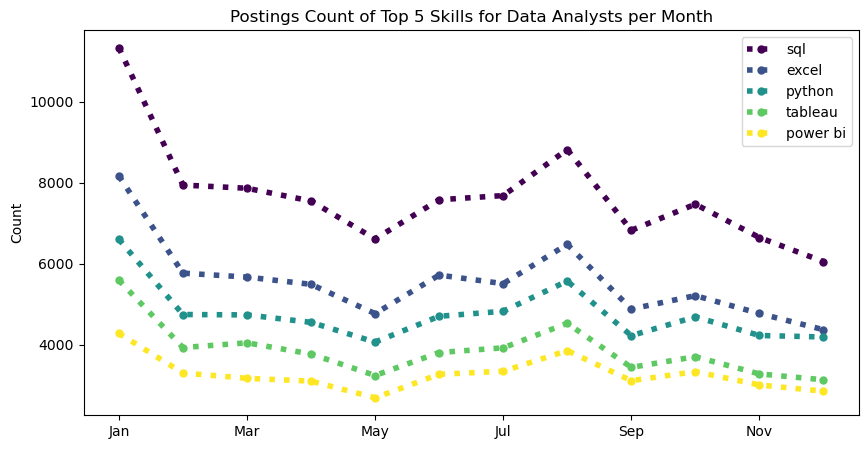

In [35]:
df_DA_pivot.iloc[:, :5].plot(
    kind="line",
    linewidth=4,
    linestyle=":",
    colormap="viridis",
    marker="o",
    markersize=5,
    figsize=(10, 5),
    xlabel="",
    ylabel="Count",
    title="Postings Count of Top 5 Skills for Data Analysts per Month",
)
plt.legend()

### Advanced Customization Scatter plot from `10_Pandas_Scatter`


In [30]:
skills_stats = df_DA_explode.groupby("job_skills").agg(
    skill_count=("job_skills", "count"), median_salary=("salary_year_avg", "median")
)
skills_top = 20
skills_stats_top = skills_stats.sort_values("skill_count", ascending=False).head(
    skills_top
)

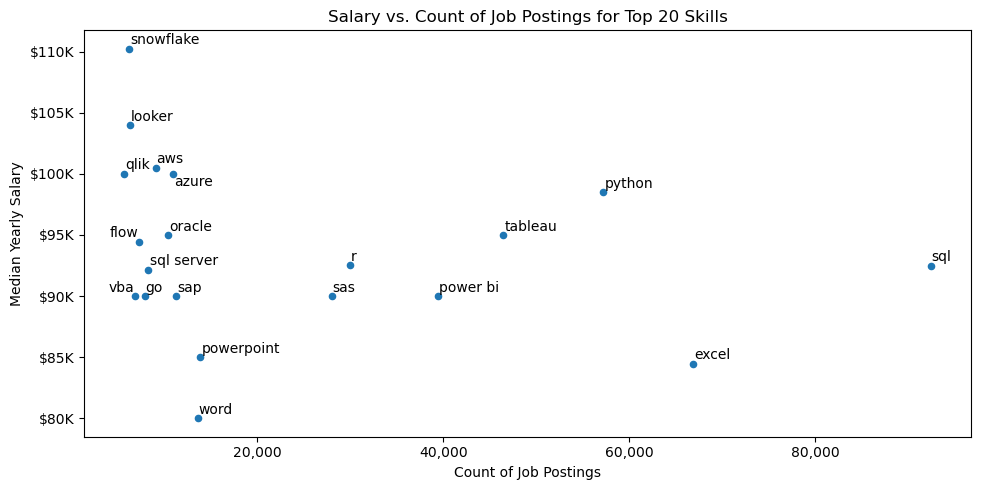

In [78]:
from adjustText import adjust_text  # Get rid of overlapping texts

skills_stats_top.plot(
    kind="scatter",
    x="skill_count",
    y="median_salary",
    xlabel="Count of Job Postings",
    ylabel="Median Yearly Salary",
    title=f"Salary vs. Count of Job Postings for Top {skills_top} Skills",
    figsize=(10, 5),
)

texts = []
for job_skill in skills_stats_top.index:
    texts.append(
        plt.text(
            skills_stats_top.loc[job_skill, "skill_count"],
            skills_stats_top.loc[job_skill, "median_salary"],
            job_skill,
        )
    )
adjust_text(texts)
plt.tight_layout()

# Convert currency's format on y_axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x):,}"))